# Advanced PySpark Project: Customer Churn Prediction Pipeline

pip install pyspark

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder\
    .appName("Churn_Prediction_Pipeline")\
    .master("local[*]")\
    .config("spark.executor.memory","4g")\
    .config("spark.driver.memory","2g")\
    .config("spark.sql.shuffle.partitions","50")\
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/28 13:18:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
print(spark.sparkContext.appName)
print(spark.sparkContext.master)


Churn_Prediction_Pipeline
local[*]


In [4]:
df = spark.read.csv("Churn.csv", header=True, inferSchema=True)

In [5]:
df.printSchema()


root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [6]:
df.show(1)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|         No|    

In [7]:
df.dropDuplicates()

DataFrame[customerID: string, gender: string, SeniorCitizen: int, Partner: string, Dependents: string, tenure: int, PhoneService: string, MultipleLines: string, InternetService: string, OnlineSecurity: string, OnlineBackup: string, DeviceProtection: string, TechSupport: string, StreamingTV: string, StreamingMovies: string, Contract: string, PaperlessBilling: string, PaymentMethod: string, MonthlyCharges: double, TotalCharges: string, Churn: string]

In [8]:
df

DataFrame[customerID: string, gender: string, SeniorCitizen: int, Partner: string, Dependents: string, tenure: int, PhoneService: string, MultipleLines: string, InternetService: string, OnlineSecurity: string, OnlineBackup: string, DeviceProtection: string, TechSupport: string, StreamingTV: string, StreamingMovies: string, Contract: string, PaperlessBilling: string, PaymentMethod: string, MonthlyCharges: double, TotalCharges: string, Churn: string]

In [9]:
df.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|  

In [10]:
df.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [11]:
df.columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
p_df=df.toPandas()

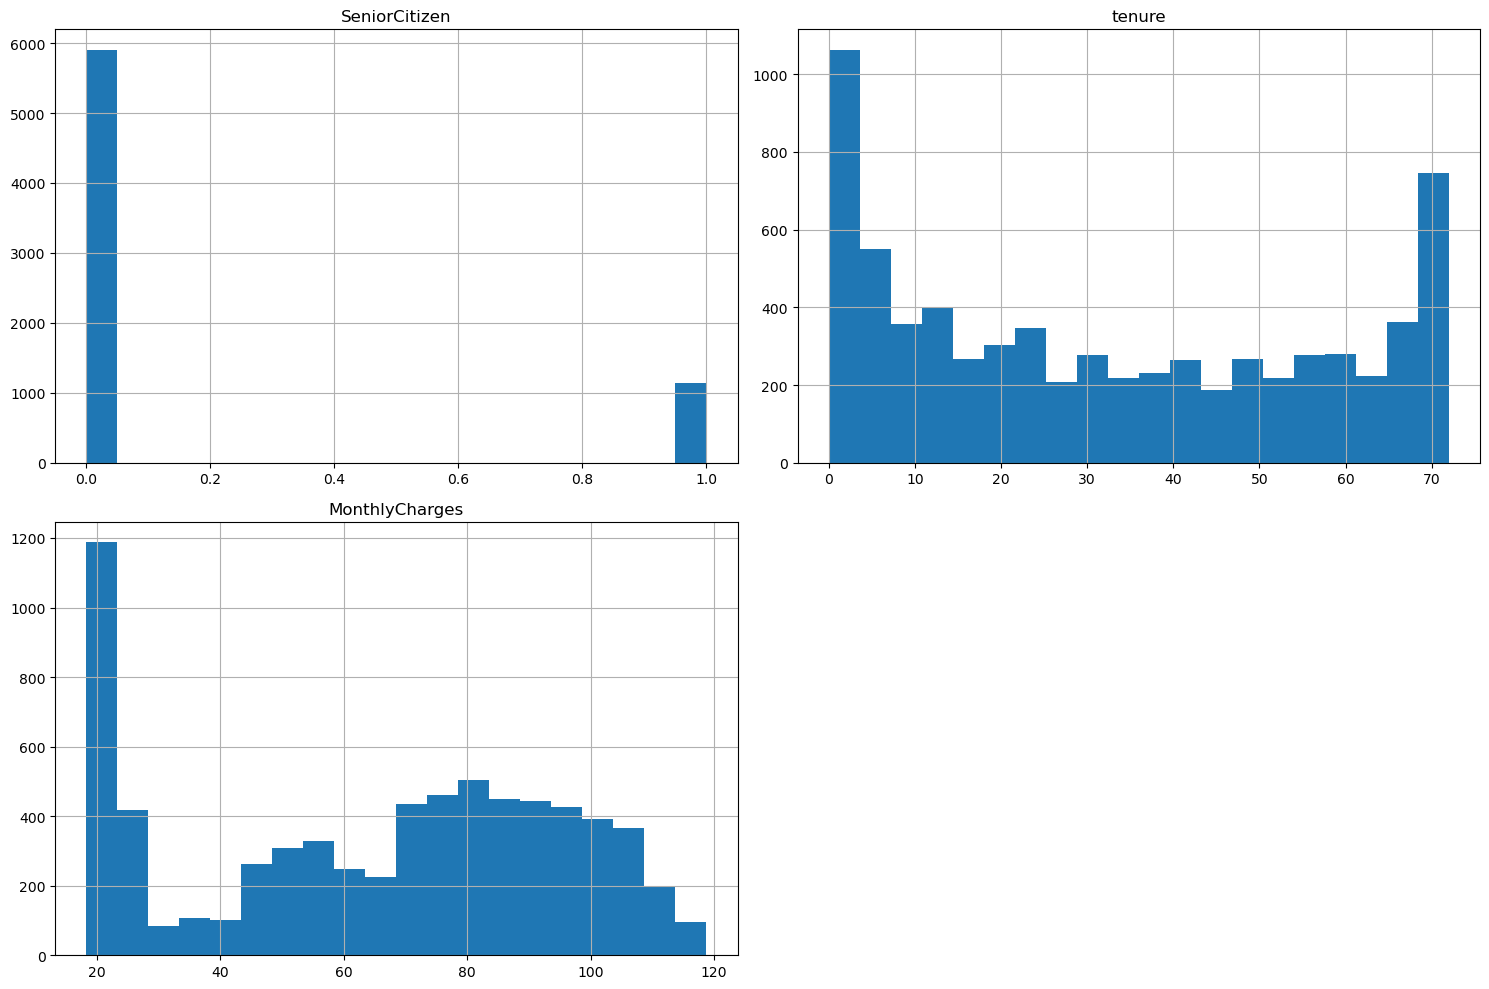

In [14]:
p_df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [15]:
from pandas.plotting import scatter_matrix


array([[<Axes: xlabel='SeniorCitizen', ylabel='SeniorCitizen'>,
        <Axes: xlabel='tenure', ylabel='SeniorCitizen'>,
        <Axes: xlabel='MonthlyCharges', ylabel='SeniorCitizen'>],
       [<Axes: xlabel='SeniorCitizen', ylabel='tenure'>,
        <Axes: xlabel='tenure', ylabel='tenure'>,
        <Axes: xlabel='MonthlyCharges', ylabel='tenure'>],
       [<Axes: xlabel='SeniorCitizen', ylabel='MonthlyCharges'>,
        <Axes: xlabel='tenure', ylabel='MonthlyCharges'>,
        <Axes: xlabel='MonthlyCharges', ylabel='MonthlyCharges'>]],
      dtype=object)

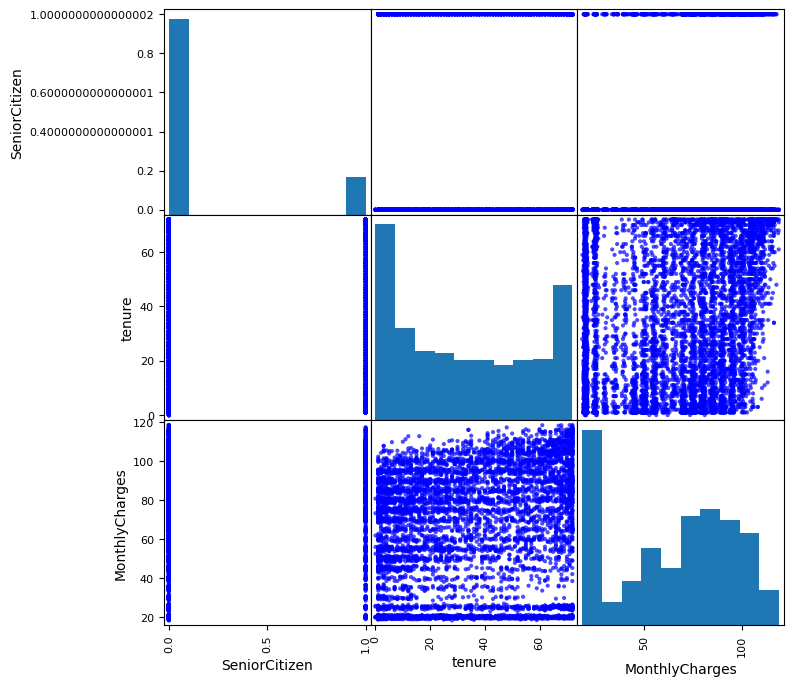

In [16]:
scatter_matrix(p_df, figsize=(8, 8), diagonal='hist', color='blue', alpha=0.7)

In [17]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns

In [18]:
p_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


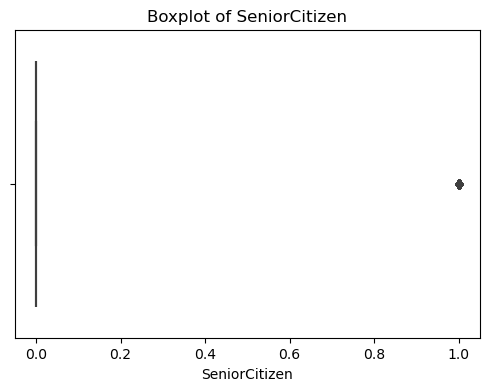

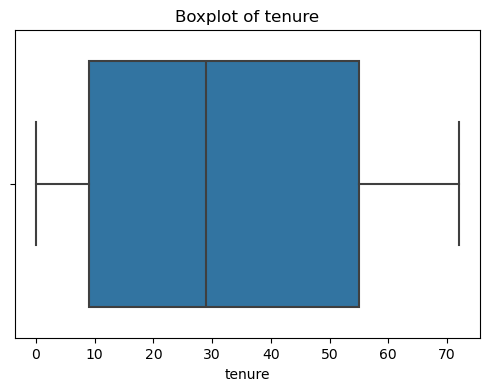

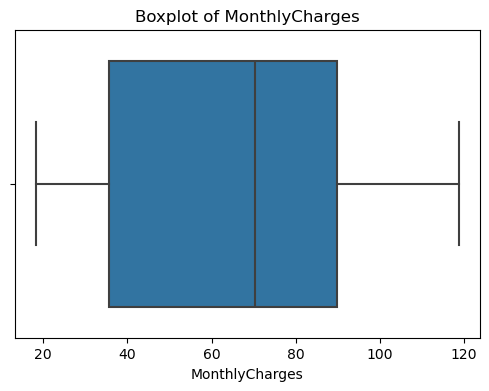

In [19]:
numeric_cols = p_df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=p_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [20]:
df = df.na.drop(how='any')

In [21]:
from pyspark.sql.functions import when, round, col

In [22]:
df = df.withColumn("Churn", when(col("Churn") == "Yes", 1).otherwise(0))

In [23]:
df = df.withColumn("AvgMonthlyCharge", round(col("TotalCharges")/col("tenure"), 2))

In [24]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- AvgMonthlyCharge: double (nullable = true)



feature transformations

In [25]:
df.createOrReplaceTempView("customers")

In [26]:
churn_analysis = spark.sql("""
    SELECT Contract,InternetService, 
           COUNT(*) as TotalCustomers, 
           SUM(Churn) as ChurnedCustomers,
           ROUND(AVG(Churn)*100, 2) as ChurnRatePercent
    FROM customers
    GROUP BY Contract,InternetService
    ORDER BY ChurnRatePercent DESC
""")

In [27]:
churn_analysis.show()

+--------------+---------------+--------------+----------------+----------------+
|      Contract|InternetService|TotalCustomers|ChurnedCustomers|ChurnRatePercent|
+--------------+---------------+--------------+----------------+----------------+
|Month-to-month|    Fiber optic|          2128|            1162|           54.61|
|Month-to-month|            DSL|          1223|             394|           32.22|
|      One year|    Fiber optic|           539|             104|           19.29|
|Month-to-month|             No|           524|              99|           18.89|
|      One year|            DSL|           570|              53|             9.3|
|      Two year|    Fiber optic|           429|              31|            7.23|
|      One year|             No|           364|               9|            2.47|
|      Two year|            DSL|           628|              12|            1.91|
|      Two year|             No|           638|               5|            0.78|
+--------------+

from the above we can see customers whoever taking up the service of fiber optic  and leaving after their contract whatever the contract may be (mtm,one,two years.

In [28]:
churn_analysis = spark.sql("""
    SELECT SeniorCitizen, 
           COUNT(*) as TotalCustomers, 
           SUM(Churn) as ChurnedCustomers,
           ROUND(AVG(Churn)*100, 2) as ChurnRatePercent
    FROM customers
    GROUP BY SeniorCitizen
    ORDER BY ChurnRatePercent DESC
""")
churn_analysis.show()

+-------------+--------------+----------------+----------------+
|SeniorCitizen|TotalCustomers|ChurnedCustomers|ChurnRatePercent|
+-------------+--------------+----------------+----------------+
|            1|          1142|             476|           41.68|
|            0|          5901|            1393|           23.61|
+-------------+--------------+----------------+----------------+



from the above results senior citizen were leaving the network mostly compared non senior citizens. need find out why the senior citizen leaving the network.

In [29]:
churn_analysis = spark.sql("""
    SELECT SeniorCitizen,gender,
           COUNT(*) as TotalCustomers, 
           SUM(Churn) as ChurnedCustomers,
           ROUND(AVG(Churn)*100, 2) as ChurnRatePercent
    FROM customers
    GROUP BY SeniorCitizen,gender
    ORDER BY ChurnRatePercent DESC
""")
churn_analysis.show()

+-------------+------+--------------+----------------+----------------+
|SeniorCitizen|gender|TotalCustomers|ChurnedCustomers|ChurnRatePercent|
+-------------+------+--------------+----------------+----------------+
|            1|Female|           568|             240|           42.25|
|            1|  Male|           574|             236|           41.11|
|            0|Female|          2920|             699|           23.94|
|            0|  Male|          2981|             694|           23.28|
+-------------+------+--------------+----------------+----------------+



female senior citizens mostly likely leaving the network. but why? what is the key factor?


In [30]:
from pyspark.sql.functions import col, when
from pyspark.sql.types import DoubleType

# Replace blank strings with nulls
df = df.withColumn("TotalCharges", when(col("TotalCharges") == "", None).otherwise(col("TotalCharges")))

# Cast to DoubleType
df = df.withColumn("TotalCharges", col("TotalCharges").cast(DoubleType()))


In [31]:
female_senior_df = df.filter((col("gender")=="Female") & (col("SeniorCitizen")==1))

In [32]:
male_senior_df=df.filter((col("gender")=="Male")& (col("SeniorCitizen")==1))

In [33]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

In [34]:
# Categorical columns:
categorical_cols = ['Partner','Dependents','PhoneService','MultipleLines','InternetService',
                    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                    'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

# Indexers & Encoders for categorical features:
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_idx") for col in categorical_cols]
encoders = [OneHotEncoder(inputCols=[f"{col}_idx"], outputCols=[f"{col}_vec"]) for col in categorical_cols]

# Numerical columns:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [35]:
assembler_inputs = [f"{col}_vec" for col in categorical_cols] + numeric_cols

assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")


In [36]:
rf = RandomForestClassifier(featuresCol="features", labelCol="Churn", numTrees=100, maxDepth=7, seed=42)

In [37]:
# Pipeline:
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])

In [38]:
rf_model_f = pipeline.fit(female_senior_df)
rf_model_m = pipeline.fit(male_senior_df)

25/05/28 13:18:57 WARN DAGScheduler: Broadcasting large task binary with size 1282.5 KiB
25/05/28 13:19:00 WARN DAGScheduler: Broadcasting large task binary with size 1310.8 KiB


In [39]:
importances = rf_model_f.stages[-1].featureImportances

In [40]:
from builtins import round
feature_importance_df = [(feature, round(importance, 4)) for feature, importance in zip(assembler_inputs, importances)]
feature_importance_df = sorted(feature_importance_df, key=lambda x: x[1], reverse=True)

In [41]:
for feature, importance in feature_importance_df:
    print(f"{feature} : {importance}")

Contract_vec : 0.0306
PaymentMethod_vec : 0.0264
StreamingTV_vec : 0.0227
DeviceProtection_vec : 0.0225
OnlineSecurity_vec : 0.0219
TechSupport_vec : 0.0204
MultipleLines_vec : 0.0187
InternetService_vec : 0.0163
OnlineBackup_vec : 0.0162
StreamingMovies_vec : 0.0158
PaperlessBilling_vec : 0.015
Partner_vec : 0.0145
tenure : 0.0136
MonthlyCharges : 0.013
Dependents_vec : 0.0128
TotalCharges : 0.01
PhoneService_vec : 0.0058


In [42]:
import_m=rf_model_m.stages[-1].featureImportances

In [43]:
feature_importance_df_m = [(feature, round(import_m, 4)) for feature, import_m in zip(assembler_inputs, import_m)]
feature_importance_df_m = sorted(feature_importance_df_m, key=lambda x: x[1], reverse=True)

for feature, import_m in feature_importance_df_m:
    print(f"{feature} : {import_m}")

PaymentMethod_vec : 0.049
DeviceProtection_vec : 0.0401
tenure : 0.0368
OnlineSecurity_vec : 0.0223
StreamingMovies_vec : 0.0223
StreamingTV_vec : 0.0205
TechSupport_vec : 0.0192
InternetService_vec : 0.0184
Partner_vec : 0.0154
MultipleLines_vec : 0.015
PaperlessBilling_vec : 0.0136
Dependents_vec : 0.0134
OnlineBackup_vec : 0.0133
TotalCharges : 0.0113
MonthlyCharges : 0.0111
Contract_vec : 0.0105
PhoneService_vec : 0.0081


In [44]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [45]:
impactful_categorical_cols = [
    "Contract", "PaymentMethod", "DeviceProtection", "OnlineSecurity",
    "StreamingTV", "StreamingMovies", "TechSupport", "InternetService",
    "Partner", "MultipleLines"
]

In [46]:
# Index and encode
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_idx") for col in impactful_categorical_cols]
encoders = [OneHotEncoder(inputCols=[f"{col}_idx"], outputCols=[f"{col}_vec"]) for col in impactful_categorical_cols]

# Final feature list
impactful_numeric_cols = ["tenure", "MonthlyCharges"]
feature_cols = impactful_numeric_cols + [f"{col}_vec" for col in impactful_categorical_cols]



In [47]:
# Vector Assembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="Churn", numTrees=100)


In [48]:
# Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])

# Train-Test Split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)


In [49]:
# Train Model
model = pipeline.fit(train_df)


In [50]:
predictions = model.transform(test_df)

In [51]:
predictions.select("Churn", "prediction", "probability").show(10)

+-----+----------+--------------------+
|Churn|prediction|         probability|
+-----+----------+--------------------+
|    1|       1.0|[0.35565073842919...|
|    0|       0.0|[0.90863303101669...|
|    0|       0.0|[0.73472132680095...|
|    0|       0.0|[0.88799576802749...|
|    1|       1.0|[0.45461968276085...|
|    0|       0.0|[0.80570190286818...|
|    0|       0.0|[0.93238064142814...|
|    0|       0.0|[0.91839150495556...|
|    0|       0.0|[0.91111555374773...|
|    0|       0.0|[0.81932715012480...|
+-----+----------+--------------------+
only showing top 10 rows



In [52]:
evaluator = BinaryClassificationEvaluator(labelCol="Churn", metricName="areaUnderROC")
roc_auc = evaluator.evaluate(predictions)
print(f"ROC AUC = {roc_auc:.4f}")


ROC AUC = 0.8359


### Training the model with all the features will also result in same roc score.
### Using the only few impactful features will results in Lower training time ,Simpler models ,Less overfitting.


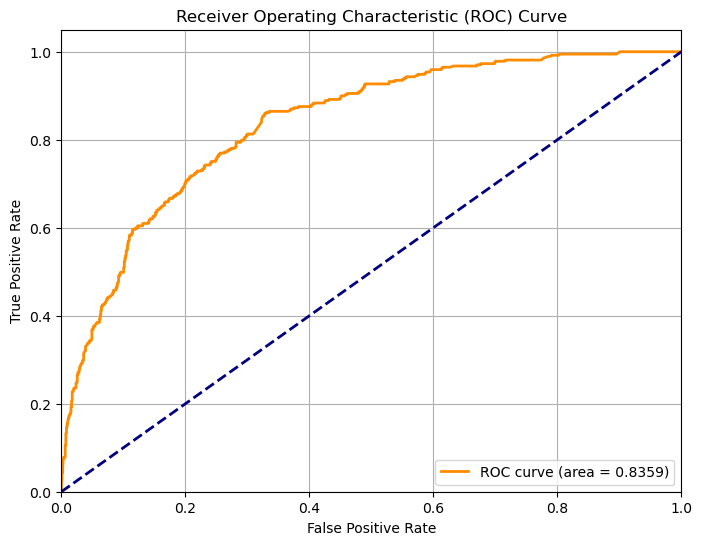

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract probability and label from PySpark DataFrame
predictions_with_prob = predictions.select("Churn", "probability").toPandas()

# Get probability of class 1 (churn)
y_true = predictions_with_prob["Churn"]
y_scores = predictions_with_prob["probability"].apply(lambda x: x[1])

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Average Precision Score (AUC of PR curve)
ap_score = average_precision_score(y_true, y_scores)


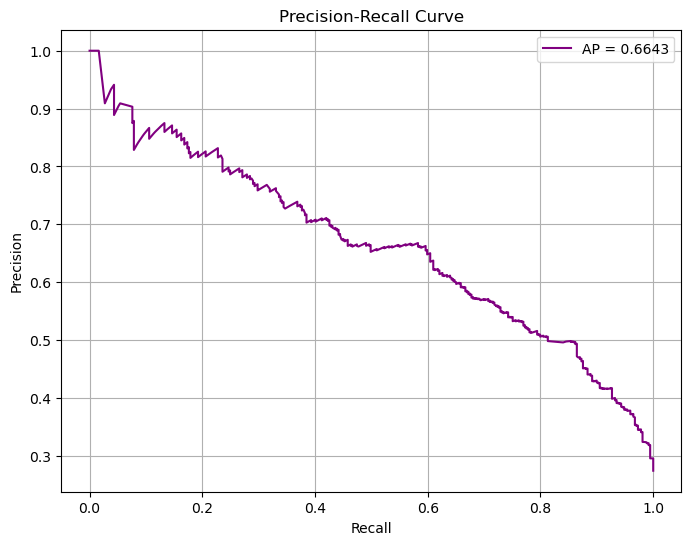

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {ap_score:.4f}', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [56]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# y_true: Actual labels
# y_scores: Predicted probabilities for the positive class

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that gives the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')
print(f'Precision: {precision[optimal_idx]}')
print(f'Recall: {recall[optimal_idx]}')
print(f'F1 Score: {f1_scores[optimal_idx]}')


Optimal Threshold: 0.29165616039798137
Precision: 0.5650319829424307
Recall: 0.7181571815718157
F1 Score: 0.6324582338902149


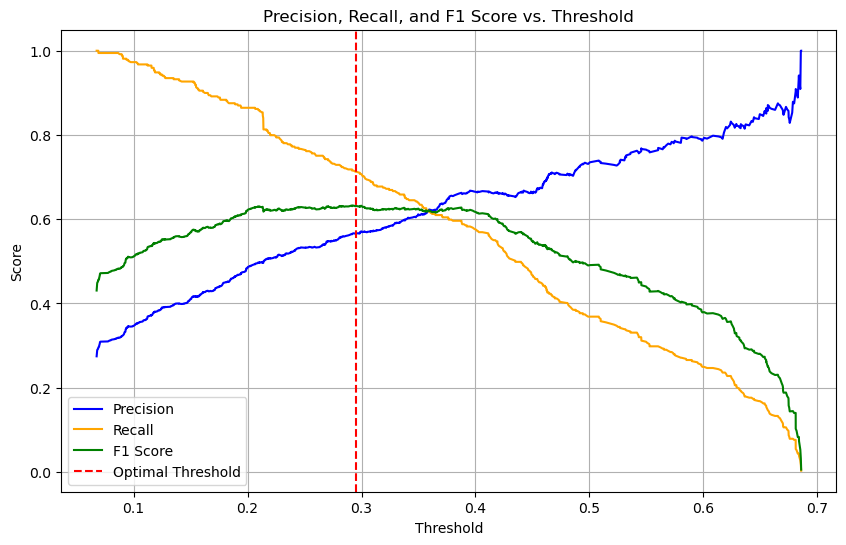

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Assuming y_true and y_scores are defined
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # Adding a small epsilon to avoid division by zero

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='green')
plt.axvline(x=0.295, color='red', linestyle='--', label='Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
predictions.select("Churn", "prediction", "probability").show(10)

+-----+----------+--------------------+
|Churn|prediction|         probability|
+-----+----------+--------------------+
|    1|       1.0|[0.35565073842919...|
|    0|       0.0|[0.90863303101669...|
|    0|       0.0|[0.73472132680095...|
|    0|       0.0|[0.88799576802749...|
|    1|       1.0|[0.45461968276085...|
|    0|       0.0|[0.80570190286818...|
|    0|       0.0|[0.93238064142814...|
|    0|       0.0|[0.91839150495556...|
|    0|       0.0|[0.91111555374773...|
|    0|       0.0|[0.81932715012480...|
+-----+----------+--------------------+
only showing top 10 rows



In [98]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# UDF to extract probability of class 1 from the probability vector
get_churn_prob = udf(lambda v: float(v[1]), DoubleType())


In [99]:
predictions = predictions.withColumn("churn_prob", get_churn_prob(col("probability")))

In [100]:
from pyspark.sql.functions import when

threshold = 0.295
predictions_custom = predictions.withColumn(
    "custom_prediction",
    when(col("churn_prob") > threshold, 1).otherwise(0)
)


In [101]:
predicted_churners = predictions_custom.filter(col("custom_prediction") == 1)


In [103]:
from pyspark.sql.types import DoubleType

# Convert prediction column to double
predictions_custom = predictions_custom.withColumn("custom_prediction", col("custom_prediction").cast(DoubleType()))


In [104]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Churn", predictionCol="custom_prediction")

precision_c = evaluator.evaluate(predictions_custom, {evaluator.metricName: "precisionByLabel"})
recall_c = evaluator.evaluate(predictions_custom, {evaluator.metricName: "recallByLabel"})
f1_c = evaluator.evaluate(predictions_custom, {evaluator.metricName: "f1"})

print(f"Precision: {precision_c:.4f}")
print(f"Recall: {recall_c:.4f}")
print(f"F1 Score: {f1_c:.4f}")


Precision: 0.8797
Recall: 0.7941
F1 Score: 0.7789


In [105]:
# Convert only needed columns to Pandas
y_true = predicted_churners.select("Churn").toPandas()["Churn"]
y_scores = predicted_churners.select("churn_prob").toPandas()["churn_prob"]
y_scores

0      0.644349
1      0.545380
2      0.333591
3      0.391287
4      0.453320
         ...   
459    0.462133
460    0.489275
461    0.298524
462    0.521537
463    0.644503
Name: churn_prob, Length: 464, dtype: float64

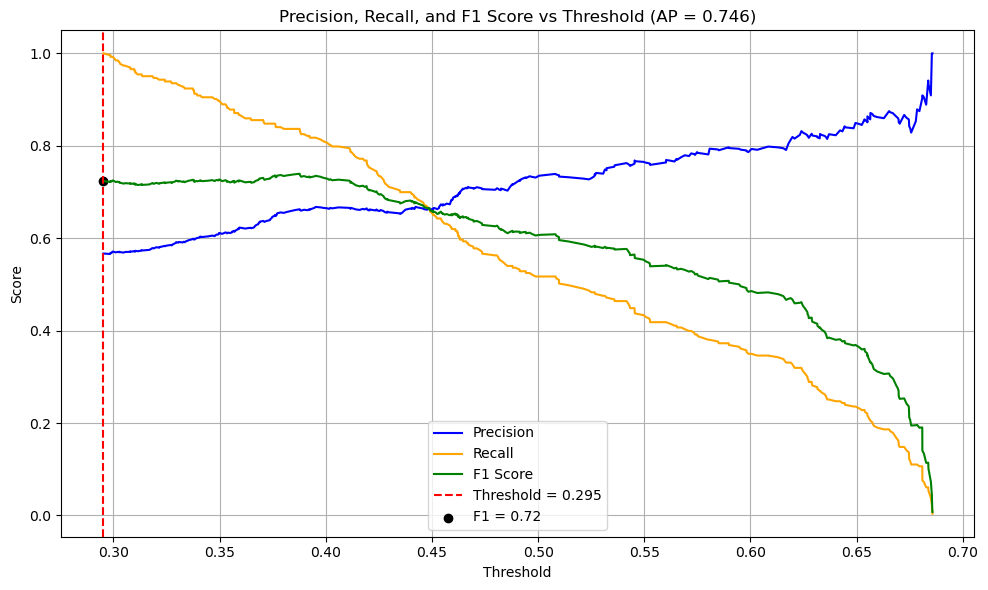

In [106]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
ap_score = average_precision_score(y_true, y_scores)

# Find index closest to custom threshold
custom_threshold = 0.295
closest_idx = (np.abs(thresholds - custom_threshold)).argmin()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="orange")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score", color="green")
plt.axvline(x=custom_threshold, color="red", linestyle="--", label=f"Threshold = {custom_threshold}")
plt.scatter(thresholds[closest_idx], f1_scores[closest_idx], color="black", label=f"F1 = {f1_scores[closest_idx]:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f"Precision, Recall, and F1 Score vs Threshold (AP = {ap_score:.3f})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
conf_matrix = predictions_custom.groupBy("Churn", "custom_prediction").count()
conf_matrix.show()


+-----+-----------------+-----+
|Churn|custom_prediction|count|
+-----+-----------------+-----+
|    0|              0.0|  775|
|    1|              0.0|  106|
|    1|              1.0|  263|
|    0|              1.0|  201|
+-----+-----------------+-----+



In [65]:
matrix = conf_matrix.toPandas().pivot(index='Churn', columns='custom_prediction', values='count').fillna(0)
TN = matrix.loc[0, 0]
FP = matrix.loc[0, 1]
FN = matrix.loc[1, 0]
TP = matrix.loc[1, 1]


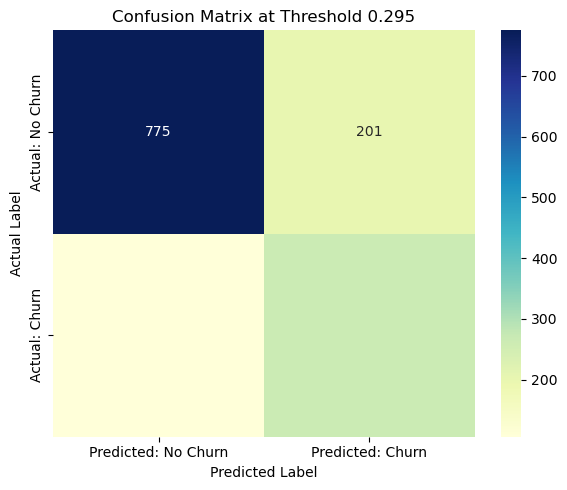

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Define the confusion matrix values
# Format: [[TN, FP], [FN, TP]]
conf_matrix = matrix

# Step 2: Create the plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Predicted: No Churn", "Predicted: Churn"],
            yticklabels=["Actual: No Churn", "Actual: Churn"])

# Step 3: Add labels and title
plt.title("Confusion Matrix at Threshold 0.295")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

# Step 4: Show the plot
plt.show()


In [107]:
spark.stop()